In [1]:
%load_ext autoreload
%autoreload 2

## Data Prep 

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler

In [3]:
mnist = fetch_openml('mnist_784', version=1)

X, labels = mnist.data, mnist.target
labels = labels.astype(int)

In [4]:
train_idxs = np.argwhere(labels != 9).flatten()
test_idxs = np.argwhere(labels == 9).flatten()

train_data = X[train_idxs]
test_data = X[test_idxs]

train_labels = labels[train_idxs]
test_labels = labels[test_idxs]

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((63042, 784), (6958, 784), (63042,), (6958,))

In [5]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

## Train the Model 

In [6]:
from meezer import Meezer

In [40]:
model = Meezer(embedding_dims=2,
               k=150,
               distance='pn',
               batch_size=1024,
               epochs=12,
               sub_epochs=6,
               margin=1,
               ntrees=50,
               search_k=-1,
               model='szubert',
               supervision_metric='sparse_categorical_crossentropy',
               supervision_weight=0.,
               annoy_index_path='annoy.index',
               early_stopping=True,
               verbose=True)

In [41]:
embeddings = model.fit_transform(X=train_scaled, Y=train_labels)

Building KNN index...



Extracting KNN from index...



Training neural network...


Epoch 0: loss 0.3461104926239649
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 1: loss 0.16440036252764856
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 2: loss 0.12386143291232478
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 3: loss 0.09902705562566116
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 4: loss 0.08720484836023855
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 5: loss 0.05872110010270316
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 6: loss 0.06708350366537379
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 7: loss 0.05337512595534413
Building new KNN index...
Extracting KNN from new index...
Training next epoch...
Epoch 8: loss 0.042772432090067015
Building new KNN index...
Extracting K

In [42]:
embeddings = model.transform(X=train_scaled)

63042/63042 [==============================] - 6s 89us/sample


In [43]:
test_embeddings = model.transform(X=test_scaled)

6958/6958 [==============================] - 1s 83us/sample


## Visualize Embeddings 

In [37]:
import matplotlib.pyplot as plt

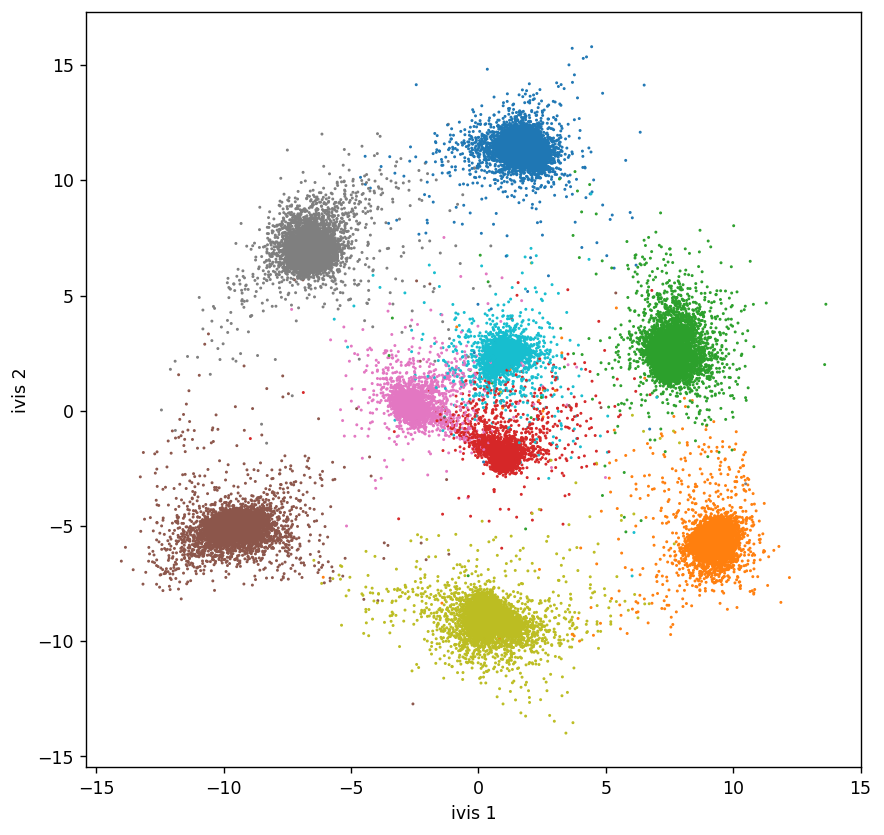

In [38]:
color = train_labels.astype(int)

plt.figure(figsize=(8, 8), dpi=125)
plt.scatter(x=embeddings[:, 0],
            y=embeddings[:, 1], c=color, cmap='tab10', s=0.5)
plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
plt.show()

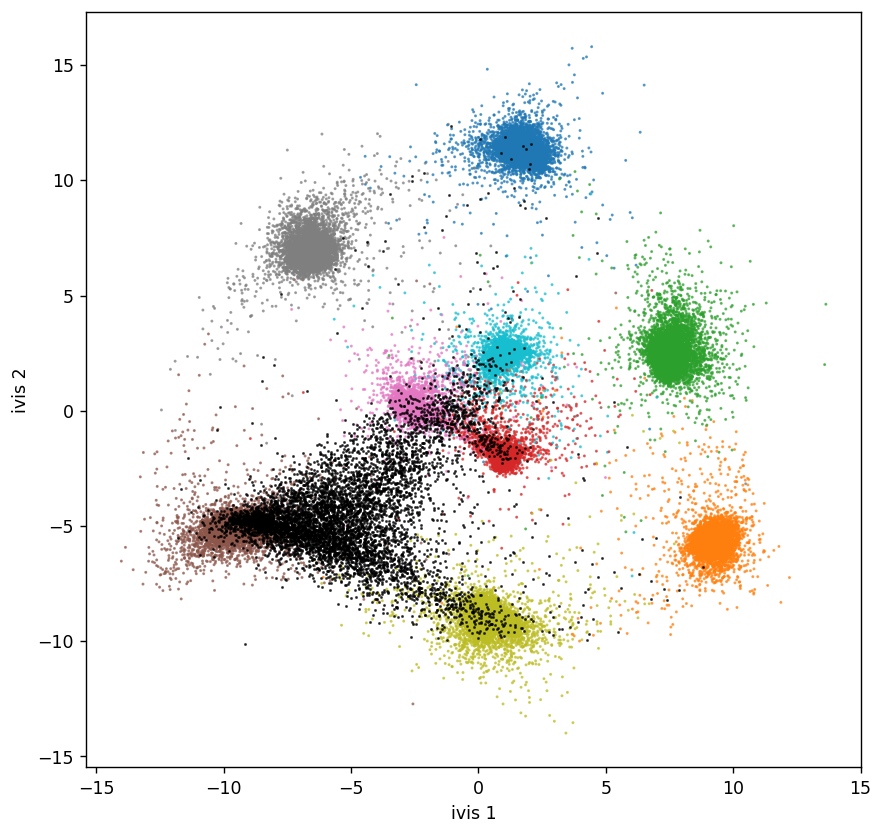

In [39]:
color = train_labels.astype(int)

plt.figure(figsize=(8, 8), dpi=125)
plt.scatter(x=embeddings[:, 0],
            y=embeddings[:, 1], c=color, cmap='tab10', s=0.5, alpha=0.7)
plt.scatter(x=test_embeddings[:, 0],
            y=test_embeddings[:, 1], c='black', s=0.5, alpha=0.7)
plt.xlabel('embedding dim 1')
plt.ylabel('embedding dim 2')
plt.show()